# <h1> ImplementElasticNetusingStochasticGradientDescent(SGD) </h1>


Loading the red wine dataset and normalised the dataset and divided it into x and Y dataframes

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#loading the WineQuality dataset and diving to two separate dataframes and combining two dataframes to single dataframe 
wine = pd.read_table("C:\Users\saikiran\Desktop\winequality-red.csv", delimiter=";") 
Xwine = wine.iloc[:, :11]
Ywine = wine.iloc[:, -1:]
normalized_Xwine=(Xwine-Xwine.mean())/Xwine.std()
print(normalized_Xwine.head())
print(Ywine.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1      -0.298454          1.966827    -1.391037        0.043403   0.223805   
2      -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3       1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466047             -0.379014  0.558100  1.288240  -0.579025   
1             0.872365              0.624168  0.028252 -0.719708   0.128910   
2            -0.083643              0.228975  0.134222 -0.331073  -0.048074   
3             0.107558              0.411372  0.664069 -0.978798  -0.461036   
4            -0.466047             -0.379014  0.558100  1.288240  -0.579025   

    alcohol  
0 -0.959946  
1 -0.584594  
2 -0.584594  


splitting the dataset to training and test dataset

In [2]:
np.random.seed(0)

msk = np.random.rand(len(Xwine)) < 0.8
X_train = normalized_Xwine[msk]
bias = pd.DataFrame(1, index=np.arange(len(X_train)), columns=['bias'])
X_train = X_train.assign(bias=bias.values)
colx = [X_train.columns[-1]] + [col for col in X_train if col != X_train.columns[-1]]
X_train = X_train[colx]

X_test = normalized_Xwine[~msk]
bias = pd.DataFrame(1, index=np.arange(len(X_test)), columns=['bias'])
X_test = X_test.assign(bias=bias.values)
coly = [X_test.columns[-1]] + [col for col in X_test if col != X_test.columns[-1]]
X_test = X_test[coly]
beta = np.zeros((12,1))
Y_train = Ywine[msk]
Y_test = Ywine[~msk]
print((X_train.shape))
print((X_test.shape))
print(Y_train.shape)
print(Y_test.shape)

print(beta)

(1260, 12)
(339, 12)
(1260, 1)
(339, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


Stochastic Gradient descent using Elastic net. Here we add ridge and lasso regularizers when updating the beta values

In [3]:
def shuffle(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [25]:
def stochastic_GD_test(x_test,y_test,theta, alpha,lamda_ridge,lamda_lasso,Rmse_test,x_test_Trans,Rmse_test_sum):
    hypothesis_test = np.dot(x_test, theta)
    loss_test =  abs(y_test-hypothesis_test)
    cost_test = np.mean(loss_test ** 2)
    gradient_test =  2 * np.dot(x_test_Trans, loss_test)
    regularization_ridge = 2*lamda_ridge*theta
    regularization_lasso = lamda_lasso
        
    for k in range(0, 500):
        theta = theta + alpha * (gradient_test +regularization_ridge+regularization_lasso)
    hypothesis_new = np.dot(x_test, theta)
    loss_new =  abs(y_test-hypothesis_new)
    cost_new = np.sum(loss_new ** 2)/len(x_test)
    Rmse_test = np.append(Rmse_test,(math.sqrt(cost_new)))
    Rmse_test_sum = np.sqrt(np.sum(cost_new))
    return Rmse_test, Rmse_test_sum
    

In [57]:

def stochastic_GD_train(x_train, y_train,x_test,y_test,theta, alpha,lamda_ridge,lamda_lasso,Rmse_train, Rmse_test, numIterations,Rmse_train_sum,Rmse_test_sum):
    
    
    for i in range(1, numIterations):
        optimal_rmse_train = []
        x_train1,y_train1 = shuffle(x_train, y_train)
        x_test1,y_test1 = shuffle(x_test, y_test)
        x_train_Trans = x_train1.transpose()
        x_test_Trans = x_test1.transpose()
        hypothesis = np.dot(x_train1, theta)
        loss =  abs(y_train1-hypothesis)
        cost = np.mean(loss ** 2)
        #print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient =  2 * np.dot(x_train_Trans, loss)
        regularization_ridge = 2*lamda_ridge*theta
        regularization_lasso = lamda_lasso
        for j in range(0, 500):
            theta = theta + alpha * (gradient +regularization_ridge +regularization_lasso)
        hypothesis2 = np.dot(x_train1, theta)
        loss2 =  abs(y_train1-hypothesis2)
        cost2 = np.sum(loss2 ** 2)/len(x_train1)
        Rmse_train = np.append(Rmse_test,(math.sqrt(cost2)))
        Rmse_test,total_rmse_test = stochastic_GD_test(x_test1,y_test1,theta, alpha,lamda_ridge,lamda_lasso,Rmse_test,x_test_Trans,Rmse_test_sum)
        
    print "alpha is",alpha,"lamda:ridge is",lamda_ridge, "lamda:lasso is:" ,lamda_lasso
    Rmse_train_sum = np.sqrt(np.sum(cost2))
    optimal_rmse_train = np.append(optimal_rmse_train,Rmse_train_sum)
    Rmse_test_sum = total_rmse_test
    
    print "total rmse_train is:", Rmse_train_sum 
    print "total rmse_test is", Rmse_test_sum
    print "optimal rmse_train value is:", min(optimal_rmse_train)
    return Rmse_train, Rmse_test,Rmse_train_sum,Rmse_test_sum
    




Training the model with different values of lambda to stocahstic gradient descent algorithm as 1)Both have small values, 2) λ1 is zero, 3) λ2 is zero and 4) larger values. I have plotted the results of my rmse of train and test with different sets of regualarizations 

alpha is 1.5e-08 lamda:ridge is 0.05 lamda:lasso is: 0.02
total rmse_train is: 0.684717690451
total rmse_test is 0.702231456062


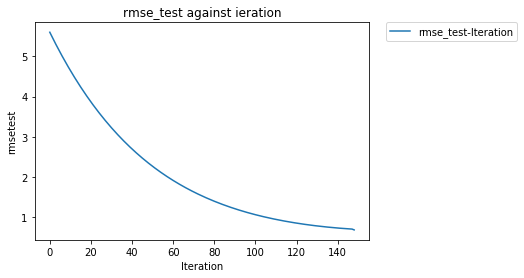

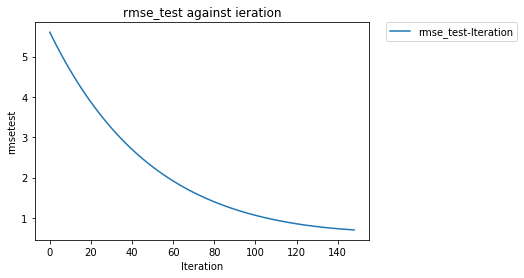

alpha is 1.5e-08 lamda:ridge is 0 lamda:lasso is: 0.1
total rmse_train is: 0.68477261935
total rmse_test is 0.702294531388


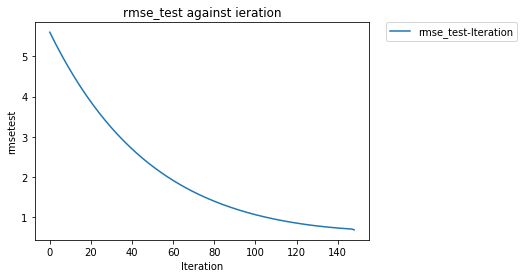

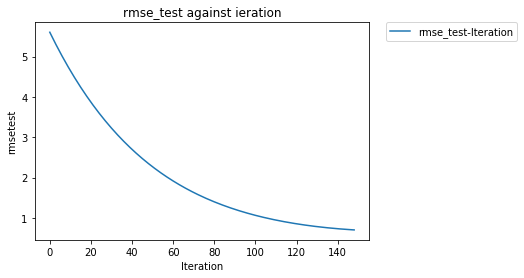

alpha is 1.5e-08 lamda:ridge is 0.5 lamda:lasso is: 0
total rmse_train is: 0.684153858333
total rmse_test is 0.701562577931


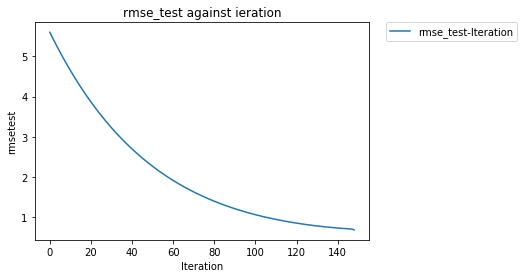

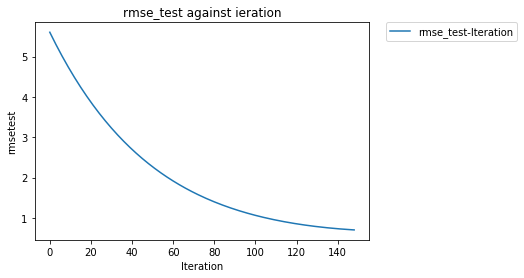

alpha is 1.5e-08 lamda:ridge is 5 lamda:lasso is: 4
total rmse_train is: 0.67847433757
total rmse_test is 0.694632123479


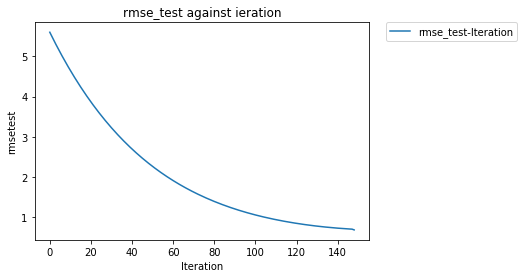

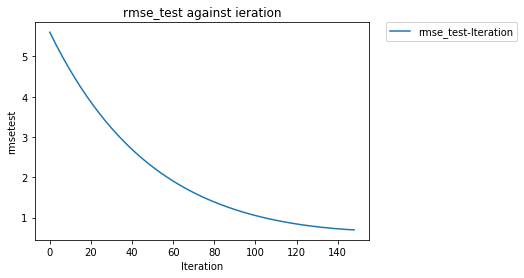

In [52]:
x_train = X_train.values
y_train = Y_train.values
x_test = X_test.values
y_test = Y_test.values
#lamda_ridge = 0.01
#lamda_lasso = 1
numIterations= 150
alpha = 0.000000015
theta = beta
Rmse_train_sum=[]
Rmse_test_sum=[]
Rmse_train1 = []
Rmse_test1 =[]
Rmse_train2 = []
Rmse_test2 =[]
Rmse_train3 = []
Rmse_test3 =[]
Rmse_train4 = []
Rmse_test4 =[]
Rmse_train1, Rmse_test1,Rmse_train_sum,Rmse_test_sum = stochastic_GD_train(x_train, y_train,x_test,y_test,theta, alpha,0.05,0.02,Rmse_train1, Rmse_test1, numIterations,Rmse_train_sum,Rmse_test_sum)
plt.plot(Rmse_train1,label = "rmse_test-Iteration")
plt.title("rmse_test against ieration")
    #Label the X and Y axes
plt.xlabel("Iteration")
plt.ylabel("rmsetest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #showing the plotted graph
plt.show()
plt.plot(Rmse_test1,label = "rmse_test-Iteration")
plt.title("rmse_test against ieration")
    #Label the X and Y axes
plt.xlabel("Iteration")
plt.ylabel("rmsetest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #showing the plotted graph
plt.show()
Rmse_train2, Rmse_test2,Rmse_train_sum,Rmse_test_sum = stochastic_GD_train(x_train, y_train,x_test,y_test,theta, alpha,0,0.1,Rmse_train2, Rmse_test2, numIterations,Rmse_train_sum,Rmse_test_sum)
plt.plot(Rmse_train2,label = "rmse_test-Iteration")
plt.title("rmse_test against ieration")
    #Label the X and Y axes
plt.xlabel("Iteration")
plt.ylabel("rmsetest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #showing the plotted graph
plt.show()
plt.plot(Rmse_test2,label = "rmse_test-Iteration")
plt.title("rmse_test against ieration")
    #Label the X and Y axes
plt.xlabel("Iteration")
plt.ylabel("rmsetest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #showing the plotted graph
plt.show()
Rmse_train3, Rmse_test3,Rmse_train_sum,Rmse_test_sum = stochastic_GD_train(x_train, y_train,x_test,y_test,theta, alpha,0.5,0,Rmse_train3, Rmse_test3, numIterations,Rmse_train_sum,Rmse_test_sum)
plt.plot(Rmse_train3,label = "rmse_test-Iteration")
plt.title("rmse_test against ieration")
    #Label the X and Y axes
plt.xlabel("Iteration")
plt.ylabel("rmsetest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #showing the plotted graph
plt.show()
plt.plot(Rmse_test3,label = "rmse_test-Iteration")
plt.title("rmse_test against ieration")
    #Label the X and Y axes
plt.xlabel("Iteration")
plt.ylabel("rmsetest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #showing the plotted graph
plt.show()
Rmse_train4, Rmse_test4,Rmse_train_sum,Rmse_test_sum = stochastic_GD_train(x_train, y_train,x_test,y_test,theta, alpha,5,4,Rmse_train4, Rmse_test4, numIterations,Rmse_train_sum,Rmse_test_sum)
plt.plot(Rmse_train4,label = "rmse_test-Iteration")
plt.title("rmse_test against ieration")
    #Label the X and Y axes
plt.xlabel("Iteration")
plt.ylabel("rmsetest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #showing the plotted graph
plt.show()
plt.plot(Rmse_test4,label = "rmse_test-Iteration")
plt.title("rmse_test against ieration")
    #Label the X and Y axes
plt.xlabel("Iteration")
plt.ylabel("rmsetest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #showing the plotted graph
plt.show()


Here for cross validation method, i have  divided my training dataset to 80% train and 20%test set again and done an grid search for various alpha and hyper parameters and displayed the total rmse train and test results of all combinations.

In [53]:
#cross_validation
print(X_train.shape)
np.random.seed(0)
msk = np.random.rand(len(X_train)) < 0.8
X_cv_train = X_train[msk]
X_cv_test = X_train[~msk]
beta_cv = np.zeros((12,1))
Y_cv_train = Y_train[msk]
Y_cv_test = Y_train[~msk]
print(X_cv_train.shape)
print(X_cv_test.shape)
print(Y_cv_train.shape)
print(Y_cv_test.shape)

(1260, 12)
(999, 12)
(261, 12)
(999, 1)
(261, 1)


In [58]:
x_train_cv = X_cv_train.values
x_test_cv = X_cv_test.values
y_train_cv = Y_cv_train.values
y_test_cv = Y_cv_test.values
Rmse_train_sum=[]
Rmse_test_sum = []
numIterations = 150
theta1 = beta_cv
rmse_cv_train=[]
rmse_cv_test=[]

alpha_list = [0.000000015,0.000000000023]
lasso_list = [0.02,0.1,0,4]
ridge_list = [0.05,0,0.5,5]
for a in alpha_list:
    for r in ridge_list:
        for l in lasso_list:
            rmse_cv_train,rmse_cv_test,Rmse_train_sum,Rmse_test_sum = stochastic_GD_train(x_train_cv, y_train_cv,x_test_cv,y_test_cv,theta1, a,r,l,rmse_cv_train, rmse_cv_test,numIterations,Rmse_train_sum,Rmse_test_sum)




alpha is 1.5e-08 lamda:ridge is 0.05 lamda:lasso is: 0.02
total rmse_train is: 0.848645799005
total rmse_test is 0.855328161127
optimal rmse_train value is: 0.848645799005
alpha is 1.5e-08 lamda:ridge is 0.05 lamda:lasso is: 0.1
total rmse_train is: 0.848618266862
total rmse_test is 0.85529068413
optimal rmse_train value is: 0.848618266862
alpha is 1.5e-08 lamda:ridge is 0.05 lamda:lasso is: 0
total rmse_train is: 0.848652685191
total rmse_test is 0.855337533863
optimal rmse_train value is: 0.848652685191
alpha is 1.5e-08 lamda:ridge is 0.05 lamda:lasso is: 4
total rmse_train is: 0.847297962106
total rmse_test is 0.853488532209
optimal rmse_train value is: 0.847297962106
alpha is 1.5e-08 lamda:ridge is 0 lamda:lasso is: 0.02
total rmse_train is: 0.848776861343
total rmse_test is 0.855453130385
optimal rmse_train value is: 0.848776861343
alpha is 1.5e-08 lamda:ridge is 0 lamda:lasso is: 0.1
total rmse_train is: 0.84874932118
total rmse_test is 0.855415647728
optimal rmse_train value is:

The final Optimal value values for my dataset after grid search are alpha = 2.3e-11, lamda_ridge = 5 lamda_lasso is 4 and my Rmse_train value is 5.67188840196 and rmse_test value is 5.62495191824


